# 6개의 Toy Data에 대해 다양한 clustering 적용 후 비교 분석 실습

- 6개의 데이터셋에 대하여 다양한 clustering을 적용해고자 합니다!

- 먼저 Toy Data을 만들어 주시고 빈칸을 채워 군집화된 결과를 확인해보세요~

- 각 모델마다 군집이 적절하게 형성되기도 하고 아닐 수도 있습니다. 이론과 연결해서 실습을 진행해봅시다 ^_^

In [1]:
# 필요한 패키지 불러오기

import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from itertools import cycle, islice

In [2]:
# 그래프 한글 깨짐 방지 폰트 설정해주기

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

## 1. 6개의 Toy Data 만들기

In [3]:
# 다른 모양 Toy Data 6개 만들기
# 바로 실행해주세요!

n_samples = 1500

# Toy Data 1
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
# Toy Data 2
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
# Toy Data 3
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
# Toy Data 4
no_structure = np.random.rand(n_samples, 2), None

# Anisotropically(비등방성: 방향에 따라 물체의 물리적 성질이 다른 것) distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
# Toy Data 5
aniso = (X_aniso, y)

# blobs with varied variances
# Toy Data 6
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

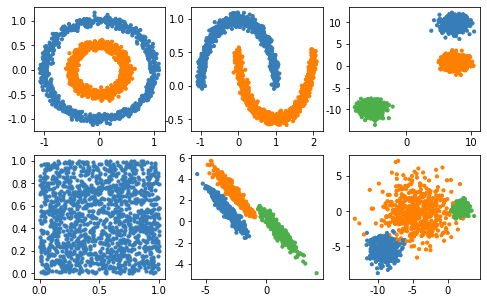

In [4]:
# 데이터셋 시각화
# 바로 실행해주세요!

X1, y1 = noisy_circles
X2, y2 = noisy_moons
X3, y3 = blobs
X4, y4 = no_structure
X5, y5 = aniso
X6, y6 = varied

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(8,5))

# noisy_circles
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a','#f781bf', '#a65628', '#984ea3', '#999999', '#e41a1c', '#dede00']), int(max(y1) + 1))))
# add black color for outliers (if any)
colors = np.append(colors, ["#000000"])
axes[0][0].scatter(X1[:, 0], X1[:, 1], s=10, color=colors[y1])

# noisy_moons
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a','#f781bf', '#a65628', '#984ea3', '#999999', '#e41a1c', '#dede00']), int(max(y2) + 1))))
# add black color for outliers (if any)
colors = np.append(colors, ["#000000"])
axes[0][1].scatter(X2[:, 0], X2[:, 1], s=10, color=colors[y2])

# blobs
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a','#f781bf', '#a65628', '#984ea3', '#999999', '#e41a1c', '#dede00']), int(max(y3) + 1))))
# add black color for outliers (if any)
colors = np.append(colors, ["#000000"])
axes[0][2].scatter(X3[:, 0], X3[:, 1], s=10, color=colors[y3])


# no_structure
axes[1][0].scatter(X4[:, 0], X4[:, 1], s=10, color='#377eb8')

# aniso
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a','#f781bf', '#a65628', '#984ea3', '#999999', '#e41a1c', '#dede00']), int(max(y5) + 1))))
# add black color for outliers (if any)
colors = np.append(colors, ["#000000"])
axes[1][1].scatter(X5[:, 0], X5[:, 1], s=10, color=colors[y5])

# varied
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a','#f781bf', '#a65628', '#984ea3', '#999999', '#e41a1c', '#dede00']), int(max(y6) + 1))))
# add black color for outliers (if any)
colors = np.append(colors, ["#000000"])
axes[1][2].scatter(X6[:, 0], X6[:, 1], s=10, color=colors[y6])

plt.show()

- 그래프를 보면 우측 상단부터 2, 2, 3, 1, 3, 3개의 그룹이 형성됨을 알 수 있습니다!

- 4번째 그래프(no_structure)는 군집이 무의미하므로 제외하고 나머지 5개 데이터에 대해 다양한 모델들을 적용해보겠습니다~!

In [5]:
# 각 데이터들은 x축, y축 데이터와 y label로 이루어져 있습니다.


print(X1.shape, y1.shape)
print(X2.shape, y2.shape)
print(X3.shape, y3.shape)
print(X5.shape, y5.shape)
print(X6.shape, y6.shape)

(1500, 2) (1500,)
(1500, 2) (1500,)
(1500, 2) (1500,)
(1500, 2) (1500,)
(1500, 2) (1500,)


- 비지도학습이므로 y는 없다고 생각하고 x만 사용하여 군집화를 진행하겠습니다~!

## 2. DBSCAN Clustering

In [6]:
from sklearn.preprocessing import StandardScaler


# 데이터 scaling을 진행해줍니다.
# 바로 실행해주세요~

scaler = StandardScaler()
scaler1 = scaler.fit(X1)
X_scaled1 = scaler.transform(X1)

scaler2 = scaler.fit(X2)
X_scaled2 = scaler.transform(X2)

scaler3 = scaler.fit(X3)
X_scaled3 = scaler.transform(X3)

scaler5 = scaler.fit(X5)
X_scaled5 = scaler.transform(X5)

scaler6 = scaler.fit(X6)
X_scaled6 = scaler.transform(X6)

X_scaled = [X_scaled1, X_scaled2, X_scaled3, X_scaled5, X_scaled6]

In [7]:
from sklearn.cluster import DBSCAN

'''
Q1. DBSCAN 모델을 선언해주세요

파라미터는 eps=0.2, min_samples=10, metric="euclidean" 로 설정해주시면 됩니다!!

fit_predict함수로 x1 데이터의 예측값을 입력해주세요. 정규화된 데이터셋을 사용할 것입니다~
'''

dbscan = DBSCAN(eps=0.2, min_samples=10, metric="euclidean")

predict = dbscan.fit_predict(X_scaled1)




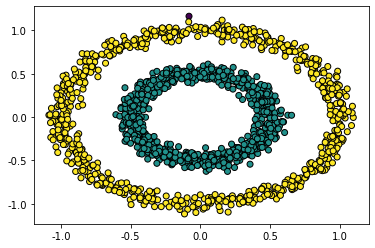

In [8]:
'''
Q2. scatter함수에서 c를 지정해주세요. 앞서 모델이 예측한 값을 사용하면 됩니다.
'''

plt.scatter(X1[:, 0], X1[:, 1], linewidth = 1,c = predict  , edgecolor = 'black')
plt.show()

- 군집이 잘 형성됨을 알 수 있습니다~! 

- 서로 떨어져 있는 class간의 군집화이므로 밀도기반의 DBSCAN이 좋은 성능을 보이네요!

- 다음은 두번째 데이터셋으로 확인해보겠습니다

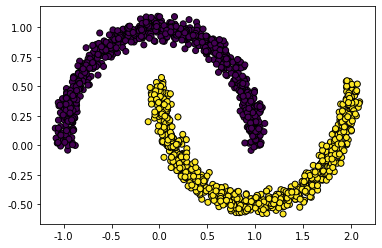

In [9]:
'''
Q3. x2 데이터셋을 활용한 실습입니다. 빈칸을 적절하게 채워주세요~
'''

dbscan = DBSCAN(eps=0.2, min_samples=10, metric="euclidean")
predict = dbscan.fit_predict(X_scaled2)
plt.scatter(X2[:, 0], X2[:, 1], linewidth = 1,c = predict,edgecolor = 'black')
plt.show()



- 마찬가지로 2번 dataset도 서로 떨어진 class간의 군집화를 진행하기 때문에 좋은 성능을 보이네요!

- 그렇다면 class들의 경계가 불분명한 dataset을 확인해볼까요?? 


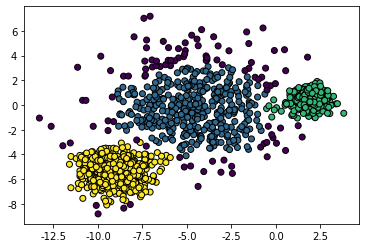

In [10]:
'''
Q4. 1~6번 데이터셋 중 class들의 경계가 불분명한 데이터셋을 선정하여 모델에 적용해보세요!
위의 시각화한 6개의 그래프를 보고 판단하시면 됩니다!
'''

dbscan = DBSCAN(eps=0.2, min_samples=10, metric="euclidean")
predict = dbscan.fit_predict(X_scaled6)
plt.scatter(X6[:, 0], X6[:, 1], linewidth = 1,c = predict,edgecolor = 'black')
plt.show()


- 예상대로 밀도기반 모델이기 때문에 군집이 잘 형성되지 못하는 모습을 보이네요 ㅠㅠ 

다른 모델을 사용해봅시다!

## 3. (Agglomerative) Hierarchical Clustering

- Hierarchical Clustering의 특징 중 하나는, 사전에 군집의 개수를 정할 필요가 없다는 장점입니다. <br>
그러나 AgglomerativeClustering 함수를 쓰기 위해서는 parameter로 군집의 개수를 정해주어야 합니다. <br>
(cf. n_clusters=None으로 하고 대신 distance_threshold를 지정해주면 model이 해당 기준에 맞게 군집의 개수를 선정합니다.) <br>
따라서, 실제 데이터의 경우에는 먼저 dendrogram을 통해 군집의 개수 또는 군집 간 거리를 확인하고 이후 작업으로 clustering을 해줄 필요가 있습니다. 

- 실습이 짧으므로, 시간관계 상 군집 개수 구분은 복습과제에서 다루겠습니다.

-  저희가 사용할 거리 측정 방식은 "ward", "average", "complete", "single" 입니다.

- 각 데이터에 대해 4가지 거리 측정 방식을 동시에 적용 후 비교해보겠습니다.

In [12]:
from sklearn.cluster import AgglomerativeClustering

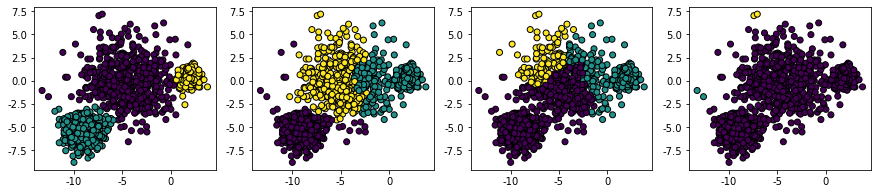

In [13]:
'''
Q5. 빈칸에 적절한 모델을 선언해주세요. 필요한 파라미터는 n_clusters와 linkage입니다.
1) n_clusters에는 예상되는 군집의 개수를 입력해야 합니다!

2) linkage는 거리 측정 방식을 의미하며 반복문을 활용해주세요!
반복문이 돌아가면서 method를 하나씩 사용하는겁니다!
'''

'''
먼저 앞서 적절하게 구분해내지 못했던 6번 데이터셋을 사용해보겠습니다~
'''


fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 3))

method = ['ward', 'average', 'complete', 'single']
for i in range(4):
  agg = AgglomerativeClustering(n_clusters=3,linkage=method[i])
  y_pred = agg.fit_predict(X6)
  axes[i].scatter(X6[:, 0], X6[:, 1], linewidth = 1,c = y_pred,edgecolor = 'black')
plt.show()


- 신기하게도 4가지 방법 모두 군집화의 결과가 다르네요!

- 가장 적절하게 군집화한 방법은 좌측 그림인 "ward" 입니다!!

- 맨 오른쪽의 "single" 방법은 경계가 불분명한 데이터셋에서는 적절하지 못한 것 같습니다..

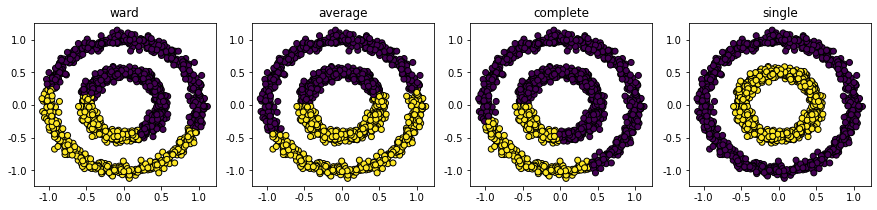

In [ ]:
'''
Q6. 다음은 1번 데이터셋을 적용해보려 합니다. 빈칸을 적절하게 채워주세요!
'''

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 3))

method = ['ward', 'average', 'complete', 'single']
for i in range(4):
  agg = AgglomerativeClustering(n_clusters=2, linkage=method[i])
  y_pred = agg.fit_predict(X1)
  axes[i].scatter(X1[:, 0], X1[:, 1], linewidth = 1,c = y_pred,edgecolor = 'black')
  axes[i].set_title(method[i])
plt.show()



- 의외로 single 방법만 적절하게 군집화를 해내네요!

- 다음은 두번째 데이터셋을 확인해보겠습니다

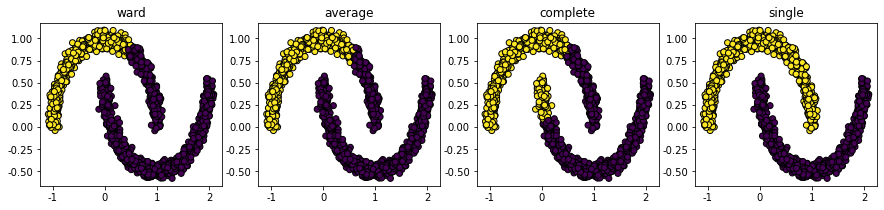

In [14]:
# 그대로 실행
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 3))

method = ['ward', 'average', 'complete', 'single']
for i in range(4):
  agg = AgglomerativeClustering(n_clusters=2, linkage=method[i])
  y_pred = agg.fit_predict(X2)
  axes[i].scatter(X2[:, 0], X2[:, 1], linewidth = 1,c = y_pred,edgecolor ='black')
  axes[i].set_title(method[i])
plt.show()


aniso 데이터도 한번 확인해보겠습니다.

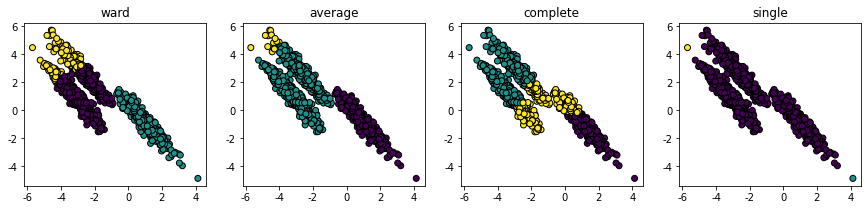

In [15]:
#그대로 실행
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 3))

method = ['ward', 'average', 'complete', 'single']
for i in range(4):
  agg = AgglomerativeClustering(n_clusters=3, linkage=method[i])
  y_pred = agg.fit_predict(X5)
  axes[i].scatter(X5[:, 0], X5[:, 1], linewidth = 1,c = y_pred,edgecolor = 'black')
  axes[i].set_title(method[i])
plt.show()

In [ ]:
'''

Q6. 위의 결과를 확인하고 아래의 빈칸을 채워주세요!!

- `circles(1)`, `moons(2)` 데이터의 경우에는 single linkage 가 가장 잘 군집되었음을 볼 수 있습니다. 
즉 single linkage는 길게 늘어진 형태의 데이터에 적절하다는 것을 알 수 있었습니다. 
그러나 aniso(5)와 varied(6)에서는 군집이 잘 되지 않았는데, 군집간 거리가 밀접한 경우에는 single linkage 방법이 좋지 않은 것 같습니다. 

- `varied(6)` 데이터의 경우에는 ward > average > complete 순으로 군집이 잘 됨을 볼 수 있습니다. 

- `aniso(5)` 데이터의 경우에는 Hierarchical clustering algorithm을 사용하는 것이 적절하지 않은 것 같습니다. 
'''

## 4. MEAN SHIFT Clustering

In [16]:
from sklearn.cluster import MeanShift

In [33]:
from sklearn.cluster import estimate_bandwidth

'''
Q7. meanshift 모델은 적절한 bandwidth값을 입력하는 것이 중요합니다.
bandwidth값에 따라 cluster의 개수와 정확도가 달라집니다.

빈칸에 알맞은 함수를 채워주세요~
'''


bandwidth = estimate_bandwidth(X1)
print('bandwidth 값:', round(bandwidth,3))

bandwidth 값: 0.742


In [32]:
'''
Q8. 위에서 확인한 bandwidth 값을 대입해주세요!!
'''

meanshift = MeanShift(bandwidth=0.742)
predict = meanshift.fit_predict(X1)
print(f"Mean Shift Cluster 유형: {np.unique(predict)}")


Mean Shift Cluster 유형: [0 1 2]


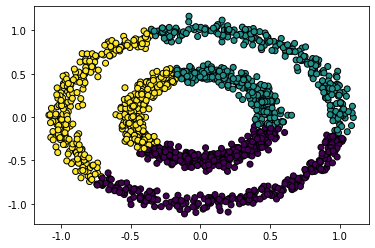

In [27]:


plt.scatter(X1[:, 0], X1[:, 1], linewidth = 1,c = predict,edgecolor = 'black')
plt.show()




- 성능이 좋지 못하네요

- 6번째 데이터셋을 확인해보겠습니다

In [28]:
bandwidth = estimate_bandwidth(X6)
print('bandwidth 값:', round(bandwidth,3))

bandwidth 값: 3.008


Mean Shift Cluster 유형: [0 1 2]


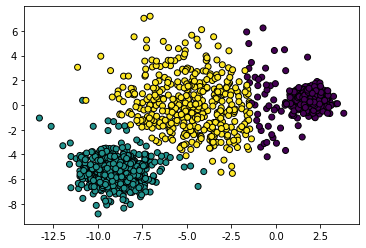

In [29]:
meanshift = MeanShift(bandwidth=3.008)
predict = meanshift.fit_predict(X6)
print(f"Mean Shift Cluster 유형: {np.unique(predict)}")

plt.scatter(X6[:, 0], X6[:, 1], linewidth = 1,c = predict,edgecolor = 'black')
plt.show()

꽤 준수한 성능을 보이는 것 같습니다!

## 5. GMM(Gaussian Mixture Model) Clustering

In [30]:
from sklearn.mixture import GaussianMixture

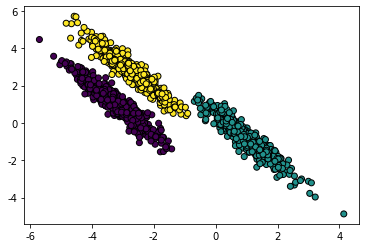

In [31]:
'''
Q9. 빈칸에 적절한 모델을 입력해주세요
파라미터는 n_components=3, random_state=42 를 사용하시면 됩니다.
'''



gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(X5)
plt.scatter(X5[:, 0], X5[:, 1], linewidth = 1,c = gmm_labels,edgecolor = 'black')
plt.show()

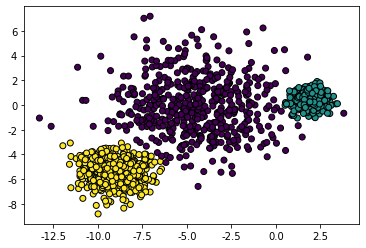

In [35]:
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(X6)
plt.scatter(X6[:, 0], X6[:, 1], linewidth = 1,c = gmm_labels,edgecolor = 'black')
plt.show()

GMM은 5번과 6번 데이터셋 모두 좋은 성능을 보임을 알 수 있네요!

- 지금까지 Toy data에 대해 다양한 clustering을 실습했습니다. 

- 비지도학습은 내가 원하는 군집화의 결과는 있을 수 있지만 정답은 없습니다. 같은 데이터셋이라도 어떤 알고리즘을 사용하느냐에 따라 결과값이 달라집니다.

따라서 원하는 군집을 만들기 위해 적절한 알고리즘을 사용해야 함을 느꼈다면 오늘 비지도학습 실습은 성공입니다!

# 이미지 전처리

In [36]:
pip install opencv-python


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


다음으로 미리 제공된 corgi.jpg 이미지를 이용하여 간단한 전처리 실습을 진행하겠습니다.

- OpenCV는 Open Source Computer Vision의 약자로 영상 처리에 사용할 수 있는 오픈 소스 라이브러리 입니다. 컴퓨터가 사람의 눈처럼 인식할 수 있게 처리해주는 역할을 하기도 하며, 우리가 많이 사용하는 카메라 어플에서도 OpenCV가 사용하기도 합니다. 

따라서 이번 실습은 openCV를 설치하여 프로젝트를 진행하도록 하겠습니다!

In [37]:
import cv2
cv2.__version__

'4.6.0'

In [38]:
'''
corgi.jpg 데이터를 가져와주세요
'''


from google.colab import files
uploaded = files.upload()

Saving corgi.jpg to corgi.jpg


<h3>OpenCV의 기본적인 함수</h3>

OpenCV에서 이미지를 출력하기 위한 기본 함수는 다음과 같습니다.

- cv2.imread(file_name, flag): 이미지를 읽어 Numpy 객체로 만드는 함수

- cv2.imshow(title, image): 특정한 이미지를 화면에 출력하는 함수

- cv2.cvtColor(image, flag): 이미지를 색상 형태를 변경하는 함수

<h3>CoLab에서의 이미지 출력</h3>

- CoLab은 Jupyter Notebook을 기반으로 동작하므로 Matplotlib를 이용하여 이미지를 출력합니다.
- OpenCV는 **BGR**을 기준으로 하며, Matplotlib는 **RGB**를 기준으로 합니다.

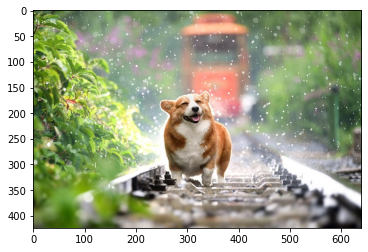

In [39]:
import cv2
import matplotlib.pyplot as plt
'''
Q10. imread의 flag 중 cv2.IMREAD_COLOR는 이미지를 원래 색상 그대로 출력해줍니다. 
빈칸에 대입해서 결과를 확인해주세요
'''
image = cv2.imread('corgi.jpg',cv2.IMREAD_COLOR)
'''
현재는 cv상태이며 plt으로 바꾸려 합니다.
따라서 BGR을 RGB 형태로 변경해야 하고 적절한 flag를 사용해줘야 합니다.
cv2.COLOR_BGR2RGB를 대입하여 결과를 확인해주세요
'''

plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.show()



이미지 데이터의 shape 확인

In [40]:
image.shape

(424, 640, 3)

이미지의 실제 array 값 확인

In [41]:
image

array([[[ 21,  83,  59],
        [ 29,  87,  63],
        [ 35,  83,  59],
        ...,
        [ 50, 101,  73],
        [ 57, 106,  78],
        [ 53, 102,  74]],

       [[ 28,  84,  61],
        [ 32,  84,  60],
        [ 35,  79,  56],
        ...,
        [ 56, 107,  79],
        [ 56, 105,  77],
        [ 57, 106,  78]],

       [[ 45,  87,  64],
        [ 44,  83,  61],
        [ 50,  86,  64],
        ...,
        [ 53, 104,  76],
        [ 51, 102,  74],
        [ 63, 114,  86]],

       ...,

       [[ 56,  81,  77],
        [ 56,  81,  77],
        [ 56,  81,  77],
        ...,
        [ 47,  47,  53],
        [ 47,  47,  53],
        [ 47,  47,  53]],

       [[ 56,  79,  75],
        [ 57,  80,  76],
        [ 57,  80,  76],
        ...,
        [ 46,  46,  52],
        [ 46,  46,  52],
        [ 46,  46,  52]],

       [[ 56,  79,  75],
        [ 56,  79,  75],
        [ 57,  78,  75],
        ...,
        [ 44,  44,  50],
        [ 44,  44,  50],
        [ 43,  43,  49]]

In [42]:
# 이미지 로드 
image = cv2.imread('corgi.jpg', cv2.IMREAD_GRAYSCALE)

#### 이미지에 blur 효과 만들기

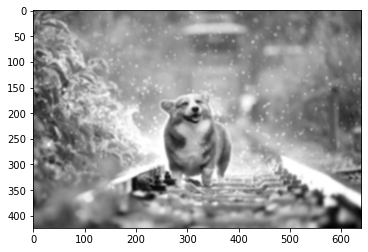

In [43]:
# blur() : 각 픽셀에 커널 개수의 역수를 곱하여 모두 더함
'''
빈칸을 적절하게 채워 blur 결과를 확인해주세요~ blur함수를 사용하시면 됩니다.
'''


image_blurry = cv2.blur(image, (5,5)) # 5 x 5 커널 평균값으로 이미지를 흐리게 함 

plt.imshow(image_blurry, cmap='gray')
plt.show()

####이미지 저장하기

- 좌측 파일란에 이미지가 저장됩니다!

In [44]:
# 이미지 로드
image = cv2.imread('corgi.jpg',cv2.IMREAD_COLOR)


In [45]:
# 이미지 저장
'''
이미지 저장은 imwrite함수를 사용합니다!!
'''

cv2.imwrite('/content/corgi.jpg', image) 

True

#### 이미지 선명하게 표현하기

filter2D 함수를 사용합니다.

- cv2.filter2D(src, ddepth, kernel, dst=None, anchor=None, delta=None, borderType=None) -> dst

src : 입력 영상

ddepth : 출력 영상 데이터 타입. (e.g) cv2.CV_8U, cv2.CV_32F, cv2.CV_64F, -1을 지정하면 src와 같은 타입의 dst 영상을 생성합니다.

kernel: 필터 마스크 행렬. 실수형.


Text(0.5, 1.0, 'Sharp Image')

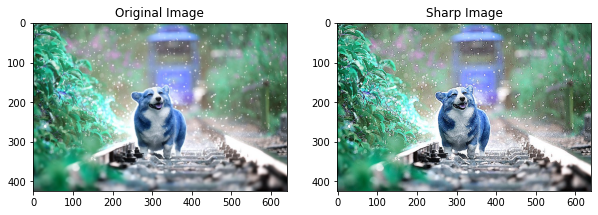

In [46]:

# 커널 생성(대상이 있는 픽셀을 강조)
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])
'''
위의 함수 설명을 참고하여 filter2D함수의 src, ddepth, kernel을 채워주세요!
'''


# 커널 적용 
image_sharp = cv2.filter2D(src = image,ddepth=-1,kernel=kernel)

fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(image_sharp, cmap='gray')
ax[1].set_title('Sharp Image')



#### 이미지 대비 높이기

- cv2.equalizeHist함수를 사용합니다.

- cv2.equalizeHist(src, dst=None) -> dst

src: 입력 영상. 그레이스케일 영상.
dst: 결과 영상.

Text(0.5, 1.0, 'Enhanced Image')

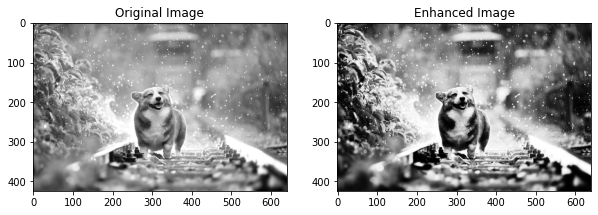

In [47]:
image = cv2.imread('corgi.jpg', cv2.IMREAD_GRAYSCALE)

'''
빈칸에 필요한 함수와 파라미터를 입력해주세요!
'''

# 이미지 대비를 향상
image_enhanced = cv2.equalizeHist(src=image, dst=None)

# plot
fig, ax = plt.subplots(1,2, figsize=(10, 5))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(image_enhanced, cmap='gray')
ax[1].set_title('Enhanced Image')

#### 경계선 탐지

Canny 함수를 활용하여 경계선을 감지 할 수 있습니다.

Canny 함수는 그래디언트 임곗값 사이의 저점과 고점을 나타내는 두 매개변수를 필요로 하며, 낮은 임곗값과 높은 임곗값 사이의 가능성 있는 경계선 픽셀은 약한 경계선 픽셀로 간주하고, 높은 임곗값보다 큰 픽셀은 강한 경계선 픽셀로 간주합니다.

In [48]:
# 이미지 로드
image_gray = cv2.imread('corgi.jpg', cv2.IMREAD_GRAYSCALE)

# 픽셀 강도의 중간값을 계산
'''
중간값 계산해주는 함수를 사용해주세요!
'''

median_intensity = np.median(image_gray)

# 중간 픽셀 강도에서 위아래 1 표준편차 떨어진 값을 임곗값으로 지정
lower_threshold = int(max(0, (1.0 - 0.33) * median_intensity))
upper_threshold = int(min(255, (1.0 + 0.33) * median_intensity))

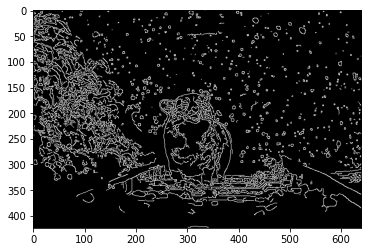

In [49]:
# Canny edge detection 적용
'''
cv2.Canny함수의 파라미터를 입력해주세요!
힌트는 cv2.Canny(gray_img, threshold1, threshold2)입니다!
'''

image_canny = cv2.Canny(image_gray, lower_threshold, upper_threshold)

plt.imshow(image_canny, cmap='gray')
plt.show()

이미지 전처리가 끝났습니다! 

고생하셨습니다 ^_^

복습문제 풀이에 참고할 수 있는 코드가 많으니까 충분히 잘 활용하시길 바랍니다.